In [1]:
import numpy as np                    # library for fast linear algebra computation
import matplotlib.pyplot as plt       # library for plotting (i.e, for creating graphs)
import seaborn as snb                 # library for making plots look nice
snb.set()

------------

## Matrix Transformations

You will now learn how to use matrices as linear functions and as data storage for performing linear transformations on vectors.

### Vectors in Python

In Python, we encode vectors in so-called **numpy arrays**. Let's have a look:

In [2]:
# This creates a new vector called "a" with two dimensions. 
# Its first entry is a 3, and its second entry is a 1.
a = np.array([3, 1])

# Let's inspect this vector by printing it
print(a)

[3 1]


In [3]:
def plot_vector(a:np.ndarray, title='', xlim=[-4,4], ylim=[-3,3], color='k') -> None:
    '''
    Plots 2D vector starting from origin of reference frame
    '''
    plt.figure()
    plt.title(title)
    plt.arrow(0, 0, a[0], a[1], head_width=0.4, facecolor=color, edgecolor=color, length_includes_head=True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.gca().set_aspect('equal')
    plt.show()
# ---

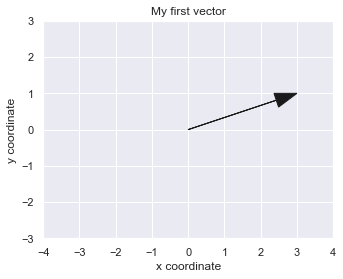

In [4]:
# plot vector a
plot_vector(a, title='My first vector')

#### Task 1:
Create your own 2D vector with numpy! <br>
Print and plot this vector!

In [5]:
'''<IMPLEMENT YOUR CODE HERE!>'''

'<IMPLEMENT YOUR CODE HERE!>'

--------

### Transformation Matrices

**Remember:** Matrices can encode linear functions!

Multiplying a matrix $\mathbf{M}$ from the left to a vector $\mathbf{a}$ is equivalent to applying a linear function $f()$ to an input $\mathbf{a}$. <br>
We store the output of this linear transformation in another vector $\mathbf{b}$. Therefore:

$\mathbf{b} = \mathbf{\mathbf{M}\mathbf{a} = f(\mathbf{a})}$, where f is a linear function. 

This is awesome (as you will now hopefully experience yourself)!

In [6]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# This is how you create a (2x2) matrix:
M = np.array([[1.1, 1.2],
              [2.1, 2.2]])

# In case you are wondering about the entires: row_number.column_number
# Thus, the ordering of the entries is exactly how we typically do this in mathematics.

# Let's inspect this matrix by printing it
print(M)

[[1.1 1.2]
 [2.1 2.2]]


### Scaling

We can use linear transformations to make vectors smaller or bigger along different dimensions (i.e., we scale them). 

#### Task 2:
Implement a function that returns a 2D transformation matrix for arbitrary scaling along x and y!

In [7]:
def get_scaling_matrix(s_x:float, s_y:float) -> np.ndarray:
    '''
    Returns a 2D matrix that implements a scaling along x and y.
    
    :param s_x:    scaling factor along x axis
    :param s_y:    scaling factor along y axis
    '''
    
    return np.array([[s_x,    0],
                     [  0,  s_y]])
# ---

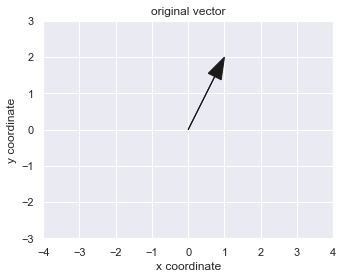

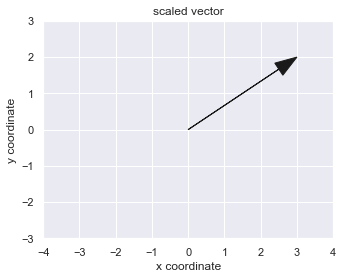

In [8]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# How to apply a linear transformation:
# -------------------------------------

# 1.) create input vector
original_vec = np.array([1, 2])
plot_vector(original_vec, title='original vector')

# 2.) generate transformation matrix  (here for scaling along x axis by factor 3)
M_scaling = get_scaling_matrix(3, 1)

# 3) perform linear function on the input vector by multiplying
# the transformation matrix from the left, and store the result in a new vector
scaled_vec = M_scaling @ original_vec

# 4.) plot scaled vector
plot_vector(scaled_vec, title='scaled vector')

-----------

### Rotating

We can use linear transformations to rotate vectors. Awesome!

#### Task 3:
Implement a function that returns a 2D transformation matrix for an arbitrary rotation with angle $\theta$ about the origin of the reference frame!

In [10]:
# (Tip: You need to use np.cos(angle_in_rad) and np.sin(angle_angle_in_rad) for this task)
def get_rotation_matrix(theta:float) -> np.ndarray:
    '''
    Returns a 2D matrix that implements a rotation about the origin of the reference frame with angle theta.
    
    :param theta:  rotation angle
    '''
    
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])    
# ---

#### Task 4:
Rotate the vector below by $\theta = -\frac{\pi}{4}$ with a transformation matrix! <br> 
Plot the resulting vector!

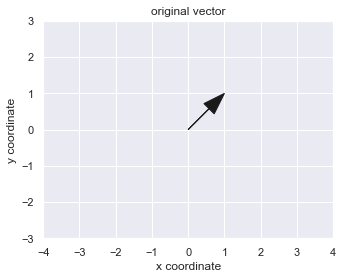

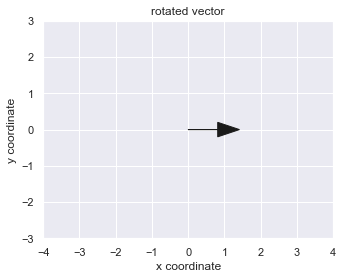

In [11]:
# 1.) create input vector
original_vec = np.array([1, 1])
plot_vector(original_vec, title='original vector')

# 2.) generate transformation matrix  (here for scaling along x axis by factor 3)
M_rotation = get_rotation_matrix(-np.pi/4.)

# 3) perform linear function on the input vector by multiplying
# the transformation matrix from the left, and store the result in a new vector
rotated_vec = M_rotation @ original_vec

# 4.) plot scaled vector
plot_vector(rotated_vec, title='rotated vector')

-----------

## Data Matrices

Before we move on, you need to learn something useful: You can use matrices not only as linear functions, <br>
but also for storing data points. Awesome! <br>
Easy to remember: A single data point is a column vector. Multiple data points next to each other is a matrix. Thus:

$\mathbf{A} = \left[ \mathbf{a}_1, \mathbf{a}_2, \dots, \mathbf{a}_3 \right]$,

where $\mathbf{a}_i$ are column vectors (i.e., data points) stored in data matrix $\mathbf{A}$. 

So let's have a look at data matrices in Python:

In [12]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# How to create a data matirx:
data_matrix = np.array([[1.1, 2.1],
                        [2.1, 2.2]])

# Humm, what?! - This looks identical to how we created the transformation matrix above!?
# Well, that is exactly right! 
# Whether some matrix is a data matrix or a transformation matrix depends solely on how you use it!

# In the case we use the matrix above as a data matrix, then this matrix would consist of two data points,
# more specifically, it would consists of two 2D column vectors: 
# The fist vector is [1.1, 2.1] and the second vector is [2.1, 2.2]. 

# We can access these vectors as follows:
print('first  data point:', data_matrix[:, 0])   

# Here, the ':' operator says that we access ALL elements from the first dimension (i.e., all rows)
# and the '0' index says that we want to access the first (we start counting at zero) entry in the second dimension (i.e. the first column)
# Thus, this line of code gives us all elements in the first column of data_matrix. 
# So it gives us the first column vector, or in other words, the first data point from this matrix.

# Print the second data point (the second column vector of the matrix)
print('second data point:', data_matrix[:, 1])

first  data point: [1.1 2.1]
second data point: [2.1 2.2]


In [13]:
def plot_image(M:np.ndarray, title='', xlim=[-3,3], ylim=[-2,3], color='k') -> None:
    '''
    Plots an image by drawing lines between neighboring data points in a data matrix.
    
    :param M: data matrix with its 2D column vectors being the data points.
    '''    
    plt.figure()
    plt.title(title)
    
    # plot lines
    for i in range(M.shape[1]-1):
        plt.plot([M[0, i], M[0, i+1]], [M[1, i], M[1, i+1]], color=color)
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.gca().set_aspect('equal')
    plt.show()            
# ---

### Example

Let's have a look at a specific data matrix that stores points of a vector image, <br> 
more specifically, it stores the corner points of the house of nicolaus. 

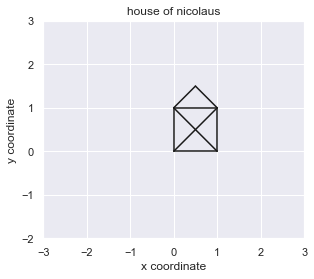

In [14]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# define the corner points of the house of nicolaus
# (every column of this matrix is a data point)
house = np.array([[0, 0, 1, 1, 0.5, 0, 1, 0, 1],
                  [0, 1, 0, 1, 1.5, 1, 1, 0, 0]])

# let's have a look
plot_image(house, title='house of nicolaus')

### Here is why data matrices are awesome

Data matrices are super helpful, because we can now apply linear transformations to them. <br>
This means that we can apply a linear transformation encoded in $\mathbf{M}$ to each vector $\mathbf{a}_i$ in data matrix $\mathbf{A}$ separately. <br>
And this happens all in a single (yes, a single!) operation! <br>
The output is then stored in a new data matrix $\mathbf{B}$ Therefore:

$\mathbf{B} = \mathbf{MA}$

Remember this! It is super helpful! 

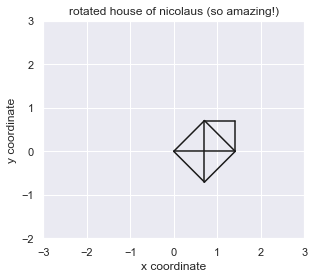

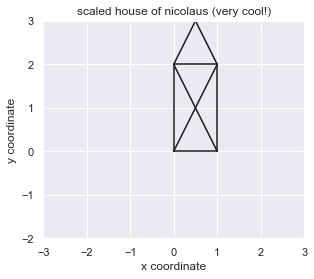

In [15]:
'''<READ AND UNDERSTAND THE CODE BELOW!>'''

# so now let us rotate the whole house of nicolaus:
house_rotated = M_rotation @ house              # .. that is it!   Awesome!

# so let's have a look
plot_image(house_rotated, 'rotated house of nicolaus (so amazing!)')

# now let us scale the whole house along y by factor 2
house_scaled = get_scaling_matrix(1, 2) @ house
plot_image(house_scaled, 'scaled house of nicolaus (very cool!)')

---------

### Determinant of matrix
**Remember:** The determinant indicates the change of the volume from before and after applying the transformation.

Let's have a look at the determinant of the scaling matrix and compare that to the scaled house of nicolaus above. <br>


In [16]:
# let's have a look at the determinant of the scaling matrix
print('determinant:', np.linalg.det(get_scaling_matrix(1, 2)))

determinant: 2.0


------

#### Task 5:
Create your own vector image! <br>
Then first, rotate it and second, scale it! <br>
Do this with matrix-matrix multiplications! <br>
Check the determinants of your matrices and think about whether these numbers make sense!

In [17]:
'''<IMPLEMENT YOUR CODE HERE!>'''

'<IMPLEMENT YOUR CODE HERE!>'

--------

### Shearing

Another common linear transformation is shearing. <br>
Let's do that the the house of nicolaus!

#### Task 6:
Implement a function that returns a 2D transformation matrix for arbitrary shearing along x and y! <br>
After that, shear the house of nicolaus!

In [18]:
# (Tipp: shearing is encoded in the off-diagunal entries of the matrix)
def get_shearing_matrix(s_x:float, s_y:float) -> np.ndarray:
    '''
    Returns a 2D matrix that implements a scaling along x and y.
    
    :param s_x:    shearing factor along x axis
    :param s_y:    shearing factor along y axis
    '''
    
    return np.array([[  1,  s_x],
                     [s_y,    1]])
# ---

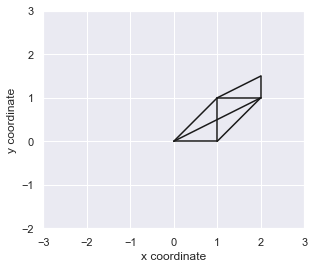

In [19]:
house_sheared = get_shearing_matrix(1, 0) @ house
plot_image(house_sheared)

### Order matters!

The order in which you apply a linear transformation matters! <br>
Changing the order of linear operations will most likely change the outcome!

**Remember:** The right-most transformation is applied first, while the left-most transformation is applied last. <br>

#### Task 7:
Compare what happens when you first apply a rotation $\mathbf{R}$ and then a shearing $\mathbf{S}$ <br>
to the house of nicolaus stored in data matrix $\mathbf{A}$ to what happens the other way around. 

Thus, compare $\mathbf{S}\mathbf{R}\mathbf{A}$ (rotation first, shearing second) to $\mathbf{R}\mathbf{S}\mathbf{A}$ (sheaering first, rotation second).

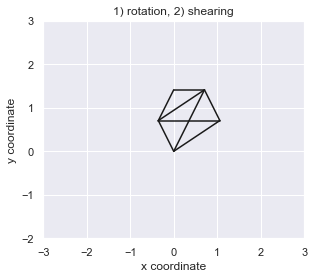

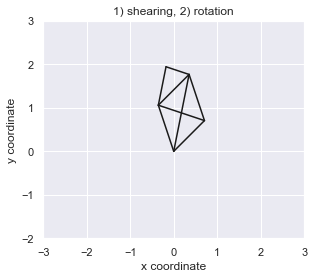

In [20]:
plot_image(get_shearing_matrix(0.5, 0) @ get_rotation_matrix(np.pi/4.) @ house, title='1) rotation, 2) shearing')
plot_image(get_rotation_matrix(np.pi/4.) @ (get_shearing_matrix(0.5, 0) @ house),  title='1) shearing, 2) rotation')